# Analyse

In [3]:
import pandas as pd
import seaborn as sns
#from matplotlib import pyplot as plt

In [55]:
data = pd.read_csv("results/error_13-12-24:20:49:43_F100K.csv", index_col=0)
#data = data.loc[data['Pair'] == '(\'UA\', \'HA\')' ]
data = pd.read_csv("results/f1-r@k_13-12-24:20:49:43_F100K.csv", index_col=0)
data = pd.read_csv("results/times-18-12-24:12:01:24_SSB.csv", index_col=0)
#data = pd.read_csv("results/Welch-Permutations.csv", sep=';', index_col=0)
#data['Initial Sample'] = data['Initial Sample'].astype(str)
data['index'] = data['count'].astype(str)
#data['Ratio cuboid'] = data['Ratio cuboid'].astype(str)
data['Test'] = data['Test'].astype(str)
data['sample ratio'] = data['sample ratio'].astype(str)


In [88]:
data.head()

,Runs,Index,count,Time,Ratio cuboid,percent of lattice,Test,index
0,0,cl,1,0.002338,0.4,0.4,All Permutations,1
1,0,cl,2,0.003063,0.4,0.4,All Permutations,2
2,0,cl,3,0.003272,0.4,0.4,All Permutations,3
3,0,cl,4,0.003579,0.4,0.4,All Permutations,4
4,0,cl,5,0.003786,0.4,0.4,All Permutations,5


In [90]:
pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
#pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
pivot

Query Sample,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Initial Sample,,,,,,,,,,
0.1,0.997765,0.996648,0.997753,1.000000,0.995518,0.997765,0.997753,0.997765,0.997765,1.000000
0.2,0.996648,0.997753,0.997765,0.996648,0.997765,0.997765,0.998883,1.000000,0.998883,0.998883
0.3,1.000000,0.998883,1.000000,0.998883,0.998883,1.000000,1.000000,0.998883,0.998883,1.000000
0.4,1.000000,0.998883,1.000000,1.000000,1.000000,1.000000,0.998883,1.000000,1.000000,1.000000
0.5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Query Sample', ylabel='Initial Sample'>

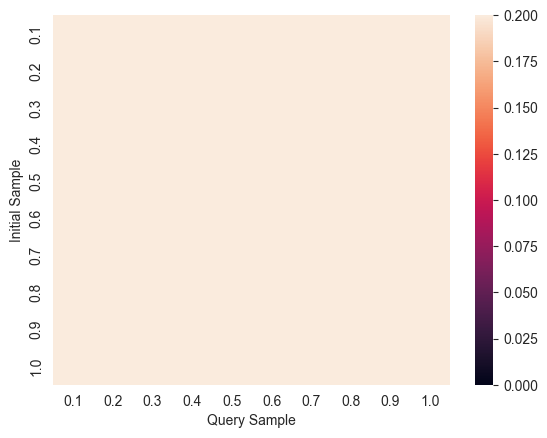

In [91]:
sns.heatmap(pivot, vmin=0, vmax=0.2)

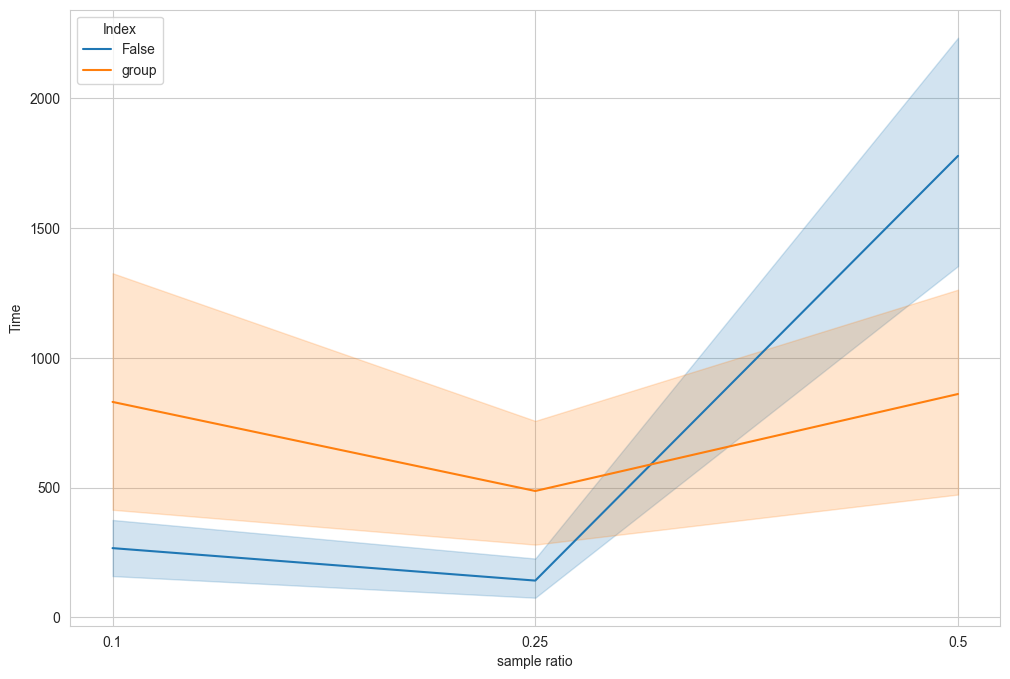

In [56]:
from matplotlib import pyplot as plt

a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
#ax.set_yscale('log')
#x='Runs'
#x="count"
x='sample ratio'
y="Time"
hue="Index"
#hue="Ratio cuboid"
#hue='sample ratio'
#hue='Test'
#x= "Query Sample"
#y = "Error on lattice"
#y = "Error on materialized"
#y="Prediction"
#y = "F1 on Queries"
#y = "F1 on Lattice"
#y= "Number of Welch"
#y= "Number of Comparisons"
#y= "Recall@k on Queries"
#y= "Recall@k on Lattice"
#hue="Initial Sample"
plot=sns.lineplot(ax=ax,data=data,x=x,y=y,hue=hue,)
#plot=sns.boxplot(ax=ax,data=data, x=x, y=y, hue=hue,)

In [57]:
save=plot.get_figure()
name="figures/withoutTies/byCuboid_SSB"+y+"_"+x+"_"+hue+".png"
#name="figures/test_"+y+"_"+x+"_"+hue+".png"
save.savefig(name)